In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [62]:
df=pd.read_csv('train.csv')
print(len(df))

43266


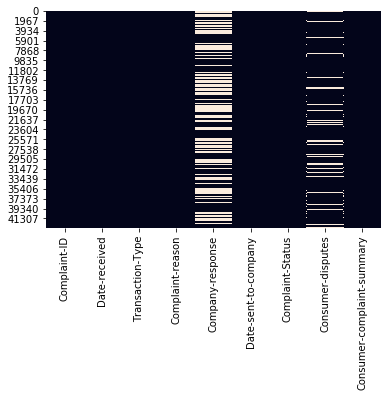

In [63]:
sns.heatmap(df.isnull(), cbar=False)

In [64]:
from collections import defaultdict
labels_counts= defaultdict(int)
for labels in df['Complaint-Status']:
    labels_counts[labels] += 1   

In [65]:
for i in labels_counts:
    print(i,labels_counts[i])

Closed with explanation 34300
Closed with non-monetary relief 5018
Closed 809
Closed with monetary relief 2818
Untimely response 321


In [66]:
df1=df.loc[df['Complaint-Status'] == 'Closed with explanation']
df2=df.loc[df['Complaint-Status'] == 'Closed with non-monetary relief']
df3=df.loc[df['Complaint-Status'] == 'Closed']
df4=df.loc[df['Complaint-Status'] == 'Closed with monetary relief']
df5=df.loc[df['Complaint-Status'] == 'Untimely response']

In [67]:
df1=df1.dropna()
#df2=df2.dropna()
#df3=df3.dropna()
#df4=df4.dropna()

In [68]:
print(len(df1))
print(len(df2))

12570
5018


In [69]:
df1=df1.take(np.random.permutation(len(df1))[:10000])
#df2=df2.take(np.random.permutation(len(df2))[:500])
#df4=df4.take(np.random.permutation(len(df3))[:500])

In [70]:
df2=df2.fillna('the')
df3=df3.fillna('the')
df4=df4.fillna('the')
df5=df5.fillna('the')

In [71]:
frames = [df1, df2, df3, df4, df5]

In [72]:
final_df=pd.concat(frames)

In [73]:
final_df.dtypes

Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Complaint-Status              object
Consumer-disputes             object
Consumer-complaint-summary    object
dtype: object

In [74]:
final_df = final_df.applymap(str)

In [75]:
final_df.dtypes

Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Complaint-Status              object
Consumer-disputes             object
Consumer-complaint-summary    object
dtype: object

In [76]:
final_df.columns

Index(['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
       'Company-response', 'Date-sent-to-company', 'Complaint-Status',
       'Consumer-disputes', 'Consumer-complaint-summary'],
      dtype='object')

In [77]:
final_df['new'] = final_df[[ 'Transaction-Type', 'Complaint-reason','Company-response', 'Consumer-complaint-summary']].apply(lambda x: ' '.join(x), axis=1)

In [78]:
final_df['new'].head()

6106     Debt collection Cont'd attempts collect debt n...
11940    Consumer Loan Managing the loan or lease Compa...
11014    Bank account or service Deposits and withdrawa...
7962     Debt collection Improper contact or sharing of...
16055    Consumer Loan Taking out the loan or lease Com...
Name: new, dtype: object

In [79]:
from nltk.corpus import stopwords
STOPWORDS = list(stopwords.words('english')) + list(stopwords.words('spanish')) + list(stopwords.words('french'))


In [80]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

lemmatizer = WordNetLemmatizer()
def text_prepare(row):
    lemmatized_words=[]
    text=row['new']
    # 1. Lowercase text
    text = text.lower() 
    # 2. Replace '/', '()', '{}', '[]', '|', '@', ',', ';' by space
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    # 4. Delete stopwords
    text = BAD_SYMBOLS_RE.sub('',text)
    text_words = text.split()
    text_words = [t for t in text_words if t not in STOPWORDS]
    
    for i in text_words:
         lemmatized_words.append(lemmatizer.lemmatize(i))
        
        
    
    
    text = ' '.join(lemmatized_words)
    return text

In [81]:
final_df['new'] = final_df.apply (lambda row: text_prepare(row),axis=1)

In [82]:
final_df.index = np.arange(0,len(final_df))

In [83]:
print(len(final_df))

18966


In [84]:
c=0
for i in final_df['Complaint-Status']:
    if i=='Closed':
            print(c)
            c=c+1
            break
    c=c+1

15018


In [85]:
#Closed with non-monetary relief
print(final_df['Complaint-Status'][10100])

#Closed with explanation
print(final_df['Complaint-Status'][1])

#Untimely response
print(final_df['Complaint-Status'][18965])

#Closed with monetary relief
print(final_df['Complaint-Status'][17300])

#Closed
print(final_df['Complaint-Status'][15018])

print(len(final_df))

Closed with non-monetary relief
Closed with explanation
Untimely response
Closed with monetary relief
Closed
18966


In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
final_df['Complaint-Status'] = le.fit_transform(final_df['Complaint-Status'])

In [87]:
#Closed with non-monetary relief
print(final_df['Complaint-Status'][10100])

#Closed with explanation
print(final_df['Complaint-Status'][1])

#Untimely response
print(final_df['Complaint-Status'][18965])

#Closed with monetary relief
print(final_df['Complaint-Status'][17300])

#Closed
print(final_df['Complaint-Status'][15018])

print(len(final_df))

3
1
4
2
0
18966


In [88]:
final_df=final_df[['new','Complaint-Status']]

In [89]:
final_df.to_csv('Updated_train.csv', sep=',')